<a href="https://colab.research.google.com/github/glaurungh/dls-course/blob/master/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import random

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [34]:
# 1) Посмотрите на случайные строчки.
data.head()
random_ids=[random.randint(0,len(data)) for i in range(10)]
data.iloc[random_ids]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1510,45,18.85,867.3,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),0
4468,55,103.70,5656.75,Female,0,Yes,Yes,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),0
1835,59,20.20,1192.3,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0
1434,65,91.55,5963.95,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),0
55,51,96.40,4911.05,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,One year,Yes,Credit card (automatic),0
3798,71,105.25,7291.75,Male,0,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,0
1001,9,45.15,416.45,Female,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,1
1453,4,86.05,308.1,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Electronic check,0
1908,32,86.10,2723.75,Female,0,Yes,Yes,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,0
3772,19,73.20,1441.1,Female,0,Yes,No,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,1


In [35]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [37]:
# YOUR CODE
print(data.shape)
data.head()

(5282, 20)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [36]:
# Незаполненные значения в датасете
# 2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() 
print(data.isna().sum())
data.info()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   

In [38]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors ='coerce')
data['TotalSpent'].dtypes

dtype('float64')

In [68]:
#и, если нужно, замените их на что-то.

total_spent_nan_indexes = data[data['TotalSpent'].isnull()].index
data.iloc[total_spent_nan_indexes, data.columns.get_loc("TotalSpent")] = 0

In [69]:
data[num_cols].head()

,ClientPeriod,MonthlySpending,TotalSpent
0,55,19.50,1026.35
1,72,25.85,1872.20
2,1,75.90,75.90
3,32,79.30,2570.00
4,60,115.25,6758.45


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

['ClientPeriod', 'MonthlySpending', 'TotalSpent']



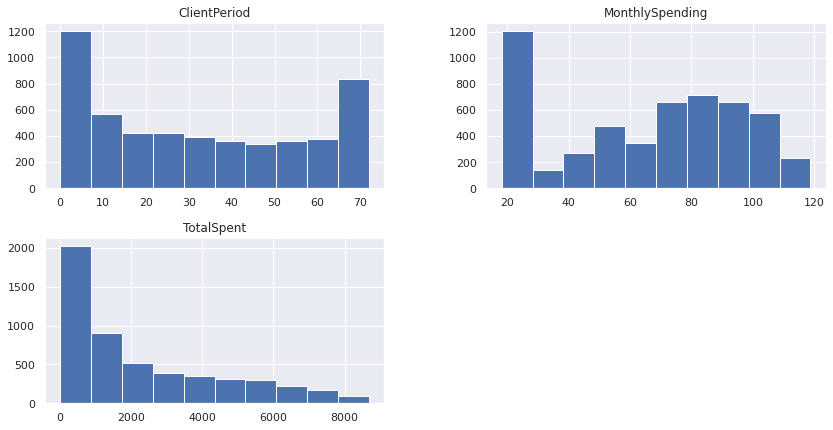

In [13]:
# YOUR CODE
print(num_cols)
data.hist(column=num_cols, figsize=(14, 7))
print()

Sex
IsSeniorCitizen
HasPartner
HasChild
HasPhoneService
HasMultiplePhoneNumbers
HasInternetService
HasOnlineSecurityService
HasOnlineBackup
HasDeviceProtection
HasTechSupportAccess
HasOnlineTV
HasMovieSubscription
HasContractPhone
IsBillingPaperless
PaymentMethod


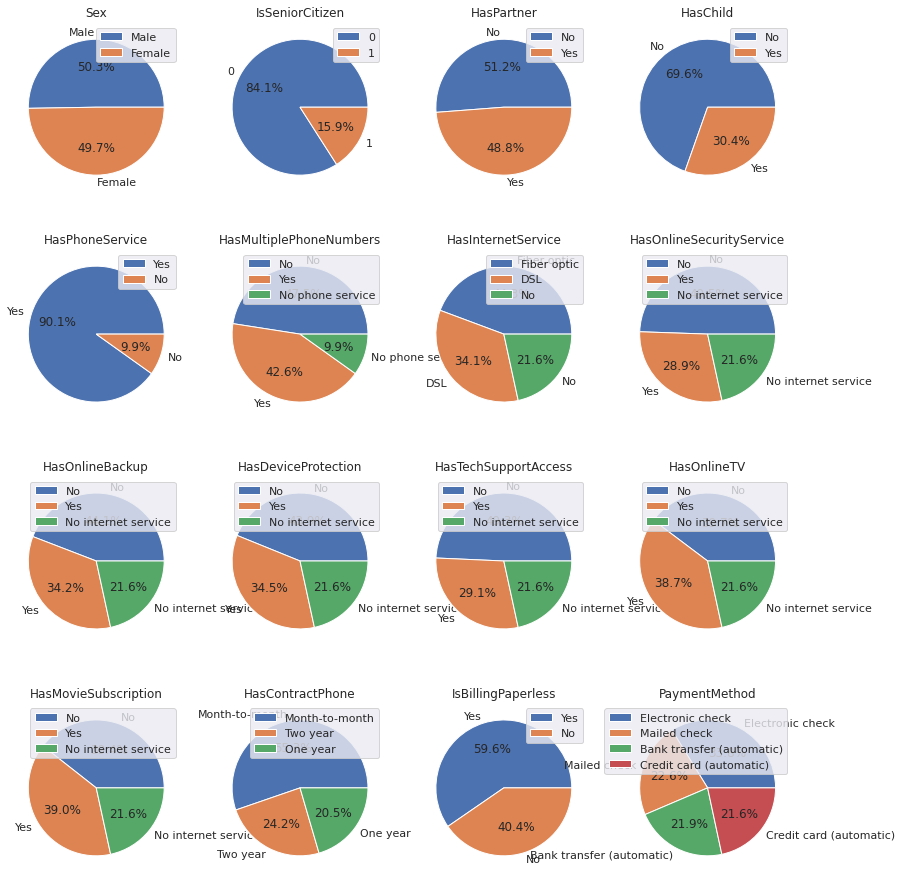

In [18]:
for cat in cat_cols:
  print(cat)
fig = plt.figure(figsize =(14, 16))
for i in range(len(cat_cols)):
  data_i=data[cat_cols[i]].value_counts()
  plt.subplot(4,4,i+1)
  plt.pie(data_i, labels = data_i.index, autopct='%1.1f%%')
  plt.title(cat_cols[i])
  plt.legend()


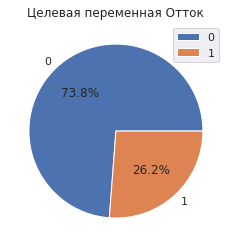

In [20]:
data.value_counts(data['Churn'])
churn_count=data['Churn'].value_counts()
plt.pie(churn_count, labels = churn_count.index, autopct='%1.1f%%')
plt.title('Целевая переменная Отток')
plt.legend()
plt.show()

Классы сбалансированы

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [57]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, roc_curve

In [70]:
# YOUR CODE
numeric_data = data[num_cols]
numeric_data.head()

,ClientPeriod,MonthlySpending,TotalSpent
0,55,19.50,1026.35
1,72,25.85,1872.20
2,1,75.90,75.90
3,32,79.30,2570.00
4,60,115.25,6758.45


In [71]:
categorial_data = data[cat_cols]
categorial_data.head()

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [72]:
dummy_features = pd.get_dummies(categorial_data)
dummy_features.head()

,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0


In [73]:
X = pd.concat([numeric_data, dummy_features], axis=1)
X_origin = data.iloc[:, :-1]
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0


In [74]:
y = data['Churn']
X.shape, X_origin.shape

((5282, 45), (5282, 19))

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

In [76]:
num_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
    ]
)

cat_transformer = Pipeline(
    steps=[
        ('ohe', OneHotEncoder()),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols),
    ]
)

clf = LogisticRegression(
    max_iter=250,
)

cv = GridSearchCV(
    estimator=clf,
    param_grid={'C': [1000, 500, 250, 100, 50, 10, 5, 1, 0.1, 0.01, 0.001]},
    scoring='roc_auc',
    refit=True,
)

pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', cv)
    ]
)

In [77]:
pipe.fit(X_origin, y);

**Выпишите** какое лучшее качество и с какими параметрами вам удалось получить

In [78]:
pipe['classifier'].best_score_

0.845128771803488

In [79]:
pipe['classifier'].best_estimator_

LogisticRegression(C=250, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
pipe.score(X_origin, y)

0.849050999178473

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [44]:
# YOUR CODE
#!pip install catboost
import catboost

     |████████████████████████████████| 76.3 MB 19 kB/s 


In [82]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data['Churn'], 
                                                       train_size=0.8, 
                                                       random_state=42)
cat = catboost.CatBoostClassifier(cat_features=cat_cols, random_seed=42, verbose=False)
cat.fit(X_train, y_train, use_best_model=True, eval_set=(X_test, y_test))
roc_auc_score(y_train, cat.predict_proba(X_train)[:, 1])


0.8752627105525429

In [83]:
roc_auc_score(y_test, cat.predict_proba(X_test)[:, 1])

0.8323020659210757

In [84]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, 
                                             cat_features=cat_cols)

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

Learning rate set to 0.083391
0:	learn: 0.4601281	total: 14.8ms	remaining: 2.94s
1:	learn: 0.3018192	total: 28.4ms	remaining: 2.81s
2:	learn: 0.2040783	total: 42.6ms	remaining: 2.8s
3:	learn: 0.1358865	total: 57.7ms	remaining: 2.83s
4:	learn: 0.0917941	total: 70.8ms	remaining: 2.76s
5:	learn: 0.0645440	total: 84.6ms	remaining: 2.73s
6:	learn: 0.0464856	total: 100ms	remaining: 2.76s
7:	learn: 0.0328627	total: 108ms	remaining: 2.6s
8:	learn: 0.0224436	total: 116ms	remaining: 2.47s
9:	learn: 0.0172441	total: 128ms	remaining: 2.42s
10:	learn: 0.0139279	total: 142ms	remaining: 2.44s
11:	learn: 0.0102320	total: 149ms	remaining: 2.33s
12:	learn: 0.0086536	total: 162ms	remaining: 2.33s
13:	learn: 0.0070316	total: 172ms	remaining: 2.29s
14:	learn: 0.0057548	total: 186ms	remaining: 2.29s
15:	learn: 0.0047121	total: 205ms	remaining: 2.36s
16:	learn: 0.0038313	total: 214ms	remaining: 2.3s
17:	learn: 0.0033482	total: 226ms	remaining: 2.28s
18:	learn: 0.0028402	total: 234ms	remaining: 2.23s
19:	lear

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [87]:
best_model = catboost.CatBoostClassifier(n_estimators=100, 
                                         cat_features=cat_cols,
                                         learning_rate=0.157346)

best_model.fit(X_train, y_train)

y_train_predicted = cat.predict_proba(X_train)[:, 1]
y_test_predicted = cat.predict_proba(X_test)[:, 1]

0:	learn: 0.6377945	total: 5.75ms	remaining: 570ms
1:	learn: 0.5948464	total: 11ms	remaining: 541ms
2:	learn: 0.5610799	total: 15.9ms	remaining: 515ms
3:	learn: 0.5353480	total: 21.4ms	remaining: 514ms
4:	learn: 0.5159254	total: 26.5ms	remaining: 503ms
5:	learn: 0.4996995	total: 32ms	remaining: 502ms
6:	learn: 0.4852975	total: 36.9ms	remaining: 491ms
7:	learn: 0.4721018	total: 42ms	remaining: 483ms
8:	learn: 0.4607495	total: 49.6ms	remaining: 501ms
9:	learn: 0.4517358	total: 54.5ms	remaining: 491ms
10:	learn: 0.4444222	total: 59.4ms	remaining: 481ms
11:	learn: 0.4383341	total: 64.4ms	remaining: 472ms
12:	learn: 0.4334347	total: 66.5ms	remaining: 445ms
13:	learn: 0.4287243	total: 69.4ms	remaining: 426ms
14:	learn: 0.4239579	total: 74.4ms	remaining: 422ms
15:	learn: 0.4196042	total: 79.4ms	remaining: 417ms
16:	learn: 0.4156486	total: 84.4ms	remaining: 412ms
17:	learn: 0.4119367	total: 89.5ms	remaining: 408ms
18:	learn: 0.4098450	total: 92.8ms	remaining: 395ms
19:	learn: 0.4081487	total: 

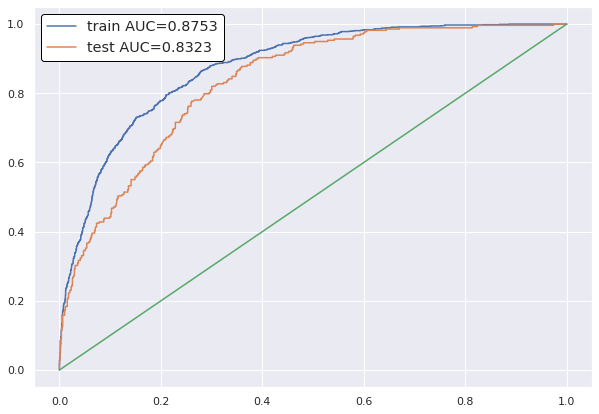

In [88]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

# Предсказания

In [89]:
X_test = pd.read_csv('./test.csv')
X_test['TotalSpent'] = pd.to_numeric(X_test['TotalSpent'], errors='coerce')
total_spent_nan_indexes = X_test[X_test['TotalSpent'].isnull()].index
X_test.iloc[total_spent_nan_indexes, X_test.columns.get_loc("TotalSpent")] = 0

submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)



# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.